# WIDER FACE Dataset

* The validation dataset is used as we don't have annotations for the testing data.
* The image is divided into different scenarios / scenes.
* The annotations of the data is as follows:
    1. Blur:
        * 0 -> no blur
        * 1 -> normal blur
        * 2 -> heavy blur
    2. Expression (facial expression):
        * 0 -> normal expression
        * 1 -> excaggerated expression
    3. Illumination:
        * 0 -> normal illumination
        * 1 -> extreme illumination
    4. Occlusion:
        * 0 -> no occlusion
        * 1 -> partial occlusion
        * 2 -> heavy occlusion
    5. Pose:
        * 0 -> typical pose
        * 1 -> not a typical pose
    6. Invalid (validity of the bouding box):
        * 0 -> false
        * 1 -> true
* The format of the annotations:
    - File name
    - Number of the bounding box (there can be multiple in one image)
    - x, y, w, h, blur, expression, illumination, invalid, occlusion, pose

## Converting the Annotations to a JSON File

In [ ]:
import json
import os

# file path for the annotations
annotations_txt_file_path = "Data/WIDER FACE Validation Set/wider_face_val_bbx_gt.txt"
image_file_path = "Data/WIDER FACE Validation Set/images/"

# storing the annotations
data = []

# getting the file data
with open(annotations_txt_file_path, 'r') as file:
    lines = file.readlines()
    
index = 0
while index < len(lines):
    # image path
    image_path = image_file_path + lines[index].strip()
    index += 1

    # number of faces
    num_faces = int(lines[index].strip())
    index += 1

    # bounding boxes and iamge attributes
    image_info = []
    for _ in range(num_faces):
        info = lines[index].strip().split()
        x, y, w, h = map(int, info[:4])
        attributes = list(map(int, info[4:]))

        image_info.append({
            "bbox": [x, y, w, h],
            "blur": attributes[0],
            "expression": attributes[1],
            "illumination": attributes[2],
            "invalid": attributes[3],
            "occlusion": attributes[4],
            "pose": attributes[5]
        })
        index += 1

    data.append({
        "image_path": image_path,
        "num_faces": num_faces,
        "image_info": image_info,
    })

# creating the json file
json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)

print(f"Parsed {len(data)} images.\nAnnotations saved to {json_path}")

Parsed 3226 images.
Annotations saved to Data/WIDER FACE Validation Set/wider_face_val_annotations.json


## Viewing an Image

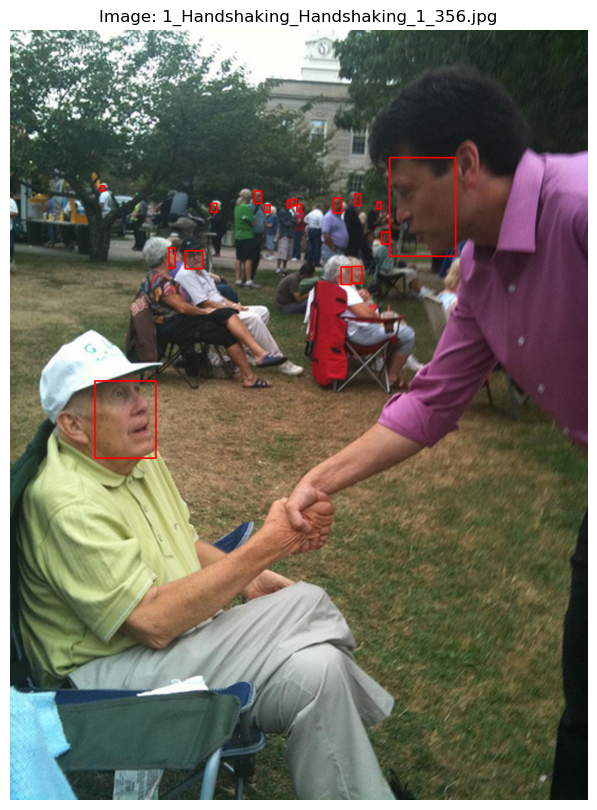

Data/WIDER FACE Validation Set/images/1--Handshaking/1_Handshaking_Handshaking_1_356.jpg
Face 1:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 1
  Pose: 0
Face 2:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 1
  Pose: 0
Face 3:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 1
  Pose: 0
Face 4:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 0
  Pose: 0
Face 5:
  Blur: 0
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 0
  Pose: 0
Face 6:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 0
  Pose: 0
Face 7:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 0
  Pose: 0
Face 8:
  Blur: 0
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 0
  Pose: 0
Face 9:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 0
  Pose: 0
Face 10:
  Blur: 2
  Expression: 0
  Illumination: 0
  Invalid: 0
  Occlusion: 1
  Pose: 0
Face 11:
 

In [2]:
import cv2
import matplotlib.pyplot as plt
import json
import os

# loading the JSON file
json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'r') as json_file:
    annotations = json.load(json_file)

# selecting an image
image = annotations[144]
image_path = image['image_path']
image_info = image['image_info']

# displaying the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for info in image_info:
    x, y, w, h = info['bbox']
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title(f"Image: {os.path.basename(image_path)}")
plt.axis("off")
plt.show()

print(image_path)
for idx, info in enumerate(image_info):
    print(f"Face {idx + 1}:")
    print(f"  Blur: {info['blur']}")
    print(f"  Expression: {info['expression']}")
    print(f"  Illumination: {info['illumination']}")
    print(f"  Invalid: {info['invalid']}")
    print(f"  Occlusion: {info['occlusion']}")
    print(f"  Pose: {info['pose']}")

## Splitting the Dataset Based on the Number of Faces in the Image

Easy -> Only one face
Medium -> Between 2 and 10 faces
Hard -> More than 10 faces

In [12]:
import json

json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'r') as json_file:
    annotations = json.load(json_file)

# intializing the categories
easy_images = []
medium_images = []
hard_images = []

# categorizing the images based on the number of faces
for annotation in annotations:
    num_faces = annotation['num_faces']
    if num_faces <= 1:
        easy_images.append(annotation)
    elif 1 <= num_faces <= 6:
        medium_images.append(annotation)
    else:
        hard_images.append(annotation)

# saving the rest as json files
output_dir = "Data/WIDER FACE Validation Set/"
with open(f"{output_dir}wider_face_num_faces_easy.json", 'w') as easy_file:
    json.dump(easy_images, easy_file, indent=4)
with open(f"{output_dir}wider_face_num_faces_medium.json", 'w') as medium_file:
    json.dump(medium_images, medium_file, indent=4)
with open(f"{output_dir}wider_face_num_faces_hard.json", 'w') as hard_file:
    json.dump(hard_images, hard_file, indent=4)

print(f"Dataset split completed!")
print(f"Easy: {len(easy_images)} images")
print(f"Medium: {len(medium_images)} images")
print(f"Hard: {len(hard_images)} images")

Dataset split completed!
Easy: 1122 images
Medium: 1089 images
Hard: 1015 images


## Splitting the Dataset Based on the Image Properties

### General Split



Easy:
* Blur = 0
* Expression = 0
* Illumination = 0
* Occlusion = 0
* Pose = 0

Medium:
At least one of the below is true:
* Blur = 1 OR
* Occlusion = 1 OR
* Pose = 1

Hard:
Any four of the below are true:
* Blur: 2 OR
* Expression: 1 OR
* Illumination: 1 OR
* Occlusion: 2 OR
* Pose: 1

In [3]:
import json

# Load the WiderFace annotations
json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'r') as json_file:
    annotations = json.load(json_file)

# Initialize categories
easy_images = []
medium_images = []
hard_images = []

# Categorize images based on metrics
for annotation in annotations:
    is_easy = True
    is_medium = False
    is_hard = False

    hard_count = 0

    for info in annotation['image_info']:
        blur = info['blur']
        expression = info['expression']
        illumination = info['illumination']
        occlusion = info['occlusion']
        pose = info['pose']

        # Determine if the image is easy
        if blur == 0 and expression == 0 and illumination == 0 and occlusion == 0 and pose == 0:
            continue  # Stays as easy

        # Determine if the image is medium
        if blur == 1 or occlusion == 1 or pose == 1:
            is_medium = True
            is_easy = False

        # Count hard conditions
        if blur == 2:
            hard_count += 1
        if expression == 1:
            hard_count += 1
        if illumination == 1:
            hard_count += 1
        if occlusion == 2:
            hard_count += 1
        if pose == 1:
            hard_count += 1

        # Determine if the image is hard (at least 2 hard conditions)
        if hard_count >= 4:
            is_hard = True
            is_easy = False
            is_medium = False
            break  # If it's hard, no need to check further

    # Categorize the image
    if is_hard:
        hard_images.append(annotation)
    elif is_medium:
        medium_images.append(annotation)
    elif is_easy:
        easy_images.append(annotation)

# Save the categorized datasets
output_dir = "Data/WIDER FACE Validation Set/"
with open(f"{output_dir}wider_face_easy.json", 'w') as easy_file:
    json.dump(easy_images, easy_file, indent=4)
with open(f"{output_dir}wider_face_medium.json", 'w') as medium_file:
    json.dump(medium_images, medium_file, indent=4)
with open(f"{output_dir}wider_face_hard.json", 'w') as hard_file:
    json.dump(hard_images, hard_file, indent=4)

print(f"Dataset split completed!")
print(f"Easy: {len(easy_images)} images")
print(f"Medium: {len(medium_images)} images")
print(f"Hard: {len(hard_images)} images")

Dataset split completed!
Easy: 1169 images
Medium: 1062 images
Hard: 995 images


### Splitting on Blur

In [4]:
import json

# Load the WiderFace annotations
json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'r') as json_file:
    annotations = json.load(json_file)

# Initialize categories
easy_images = []
medium_images = []
hard_images = []

# Categorize images based on blur levels
for annotation in annotations:
    is_easy = True
    is_medium = False
    is_hard = False

    for info in annotation['image_info']:
        blur = info['blur']

        # Determine if the image is hard
        if blur == 2:
            is_hard = True
            is_easy = False
            is_medium = False
            break  # If hard, no need to check further

        # Determine if the image is medium
        if blur == 1:
            is_medium = True
            is_easy = False

    # Categorize the image
    if is_hard:
        hard_images.append(annotation)
    elif is_medium:
        medium_images.append(annotation)
    elif is_easy:
        easy_images.append(annotation)

# Save the categorized datasets
output_dir = "Data/WIDER FACE Validation Set/"
with open(f"{output_dir}wider_face_easy_blur.json", 'w') as easy_file:
    json.dump(easy_images, easy_file, indent=4)
with open(f"{output_dir}wider_face_medium_blur.json", 'w') as medium_file:
    json.dump(medium_images, medium_file, indent=4)
with open(f"{output_dir}wider_face_hard_blur.json", 'w') as hard_file:
    json.dump(hard_images, hard_file, indent=4)

print(f"Dataset split completed!")
print(f"Easy: {len(easy_images)} images")
print(f"Medium: {len(medium_images)} images")
print(f"Hard: {len(hard_images)} images")

Dataset split completed!
Easy: 1335 images
Medium: 727 images
Hard: 1164 images


### Splitting on Occlusion

In [7]:
import json

# Load the WiderFace annotations
json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'r') as json_file:
    annotations = json.load(json_file)

# Initialize categories
easy_images = []
medium_images = []
hard_images = []

# Categorize images based on occlusion levels
for annotation in annotations:
    is_easy = True
    is_medium = False
    is_hard = False

    for info in annotation['image_info']:
        occlusion = info['occlusion']

        # Determine if the image is hard
        if occlusion == 2:
            is_hard = True
            is_easy = False
            is_medium = False
            break  # If hard, no need to check further

        # Determine if the image is medium
        if occlusion == 1:
            is_medium = True
            is_easy = False

    # Categorize the image
    if is_hard:
        hard_images.append(annotation)
    elif is_medium:
        medium_images.append(annotation)
    elif is_easy:
        easy_images.append(annotation)

# Save the categorized datasets
output_dir = "Data/WIDER FACE Validation Set/"
with open(f"{output_dir}wider_face_easy_occlusion.json", 'w') as easy_file:
    json.dump(easy_images, easy_file, indent=4)
with open(f"{output_dir}wider_face_medium_occlusion.json", 'w') as medium_file:
    json.dump(medium_images, medium_file, indent=4)
with open(f"{output_dir}wider_face_hard_occlusion.json", 'w') as hard_file:
    json.dump(hard_images, hard_file, indent=4)

print(f"Dataset split completed!")
print(f"Easy: {len(easy_images)} images")
print(f"Medium: {len(medium_images)} images")
print(f"Hard: {len(hard_images)} images")

Dataset split completed!
Easy: 1820 images
Medium: 341 images
Hard: 1065 images


### Splitting on Illumination

In [6]:
import json

# Load the WiderFace annotations
json_path = "Data/WIDER FACE Validation Set/wider_face_val_annotations.json"
with open(json_path, 'r') as json_file:
    annotations = json.load(json_file)

# Initialize categories
normal_illumination_images = []
extreme_illumination_images = []

# Categorize images based on illumination levels
for annotation in annotations:
    is_normal = True

    for info in annotation['image_info']:
        illumination = info['illumination']

        # Determine if the image has extreme illumination
        if illumination == 1:
            is_normal = False
            extreme_illumination_images.append(annotation)
            break  # No need to check further if it is already extreme

    # If all faces have normal illumination, add to the normal category
    if is_normal:
        normal_illumination_images.append(annotation)

# Save the categorized datasets
output_dir = "Data/WIDER FACE Validation Set/"
with open(f"{output_dir}wider_face_normal_illumination.json", 'w') as normal_file:
    json.dump(normal_illumination_images, normal_file, indent=4)
with open(f"{output_dir}wider_face_extreme_illumination.json", 'w') as extreme_file:
    json.dump(extreme_illumination_images, extreme_file, indent=4)

print(f"Dataset split completed!")
print(f"Normal Illumination: {len(normal_illumination_images)} images")
print(f"Extreme Illumination: {len(extreme_illumination_images)} images")

Dataset split completed!
Normal Illumination: 2777 images
Extreme Illumination: 449 images
